In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture

In [4]:
data = pd.read_csv("Wholesale customers data_clustering.csv")
print("Dataset loaded successfully!")
data.head()

Dataset loaded successfully!


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None

Missing Values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [7]:
# Select relevant features for clustering
X = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [8]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

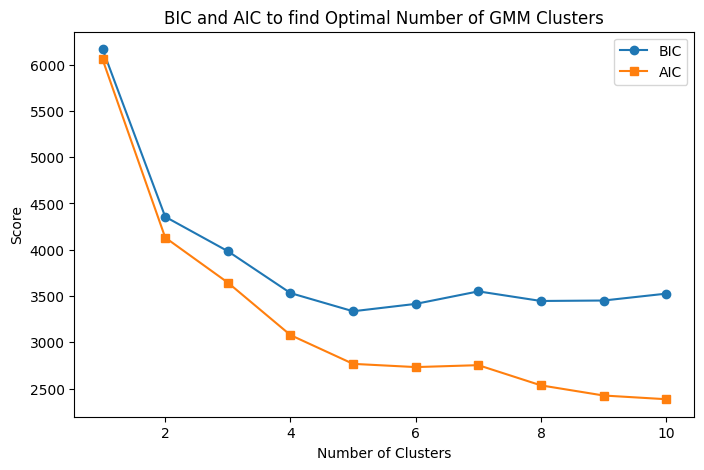

In [9]:
bic = []
aic = []
n_components_range = range(1, 11)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))
    aic.append(gmm.aic(X_scaled))

# Plot BIC and AIC to choose the best number of clusters
plt.figure(figsize=(8,5))
plt.plot(n_components_range, bic, label='BIC', marker='o')
plt.plot(n_components_range, aic, label='AIC', marker='s')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('BIC and AIC to find Optimal Number of GMM Clusters')
plt.legend()
plt.show()

In [10]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

# Add cluster labels to the dataset
data['Cluster'] = labels

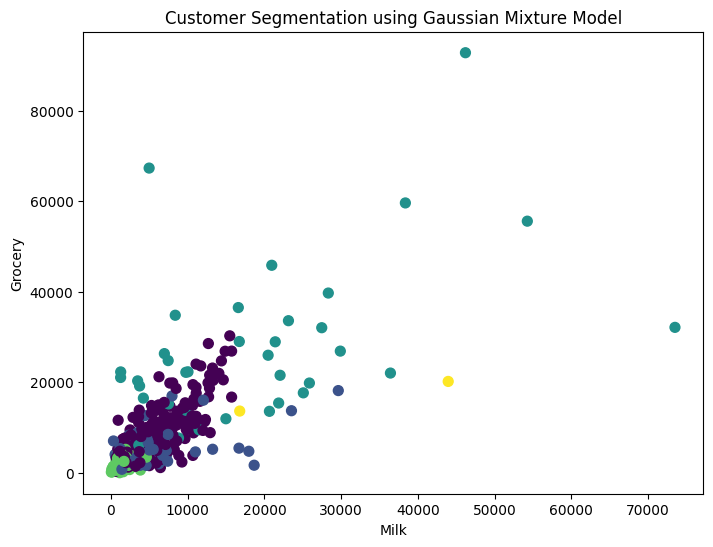

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(
    X['Milk'], 
    X['Grocery'], 
    c=labels, cmap='viridis', s=50
)
plt.title('Customer Segmentation using Gaussian Mixture Model')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()

In [14]:
cluster_summary = data.groupby('Cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()
print("\nCluster Summary:")
print(cluster_summary)



Cluster Summary:
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0         7463.675676   6440.454054   9575.724324   1287.891892   
1        26355.115942   5438.710145   5155.434783   7632.840580   
2        10347.756757  18703.945946  27503.432432   2257.162162   
3        11077.666667   1570.217687   2176.224490   2760.585034   
4        34782.000000  30367.000000  16898.000000  48701.500000   

         Detergents_Paper    Delicassen  
Cluster                                  
0             3956.383784   1196.372973  
1              721.550725   2118.594203  
2            11811.243243   4099.297297  
3              323.891156    668.061224  
4              755.500000  26776.000000  
